In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

### 0. Data load

In [2]:
# path1='/Users/howsang/Documents/004.Project/000.data/T_PATIENTS_DAILY_WHOLE_0730.csv'
path2='/home/hwchoi/001.project/data/T_PATIENTS_DAILY_WHOLE_0731.csv'
df=pd.read_csv(path2)
df.head(2)

,sido,create_date,sido_cd,weekend_yn,grid_x,grid_y,sat_x,sat_y,min_ta,max_ta,...,ta_mean_six_am2,ta_min_six_pm1,ta_max_six_pm1,ta_mean_six_pm1,ta_min_six_pm2,ta_max_six_pm2,ta_mean_six_pm2,patientsCnt,instDate,updtDate
0,경기도,2014-05-01,31,0,60,120,NaN,NaN,9.6,24.2,...,15,21,24,22,14,21,17,0,2024-07-31,2024-07-31
1,충청북도,2014-05-01,33,0,69,107,NaN,NaN,10.5,23.7,...,15,21,23,22,15,22,18,0,2024-07-31,2024-07-31


In [3]:
# 'date' 컬럼을 datetime 형식으로 변환
df['create_date'] = pd.to_datetime(df['create_date'])
# year, month, day 컬럼 생성
df['year'] = df['create_date'].dt.year
df['month'] = df['create_date'].dt.month
df['day'] = df['create_date'].dt.day
# patientsCnt를 0과 1로 변환
df['patientsCD'] = np.where(df['patientsCnt'] == 0, 0, 1)

In [4]:
print(df.columns)

lst=['create_date', 'year', 'month', 'day', 'sido', 'sido_cd', 'weekend_yn', 
    'min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm',
    'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp', 'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days',
    'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man',
    'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1',
    'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2', 'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
    'ta_mean_six_pm2', 'patientsCnt', 'patientsCD']

df=df[lst]

Index(['sido', 'create_date', 'sido_cd', 'weekend_yn', 'grid_x', 'grid_y',
       'sat_x', 'sat_y', 'min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel',
       'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm',
       'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp',
       'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days',
       'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days',
       'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man',
       'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am',
       'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1',
       'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2',
       'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1',
       'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
       'ta_mean_six_pm2', 'patientsCnt', 'instDate', 'updtDate', 'year',
       'month', 'day', 'patientsCD'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26010 entries, 0 to 26009
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   create_date        26010 non-null  datetime64[ns]
 1   year               26010 non-null  int32         
 2   month              26010 non-null  int32         
 3   day                26010 non-null  int32         
 4   sido               26010 non-null  object        
 5   sido_cd            26010 non-null  int64         
 6   weekend_yn         26010 non-null  int64         
 7   min_ta             26010 non-null  float64       
 8   max_ta             26010 non-null  float64       
 9   mean_ta            26010 non-null  float64       
 10  gap_ta             26010 non-null  float64       
 11  min_tafeel         26010 non-null  float64       
 12  max_tafeel         26010 non-null  float64       
 13  mean_tafeel        26010 non-null  float64       
 14  gap_ta

In [6]:
df.describe()

,create_date,year,month,day,sido_cd,weekend_yn,min_ta,max_ta,mean_ta,gap_ta,...,ta_max_six_am2,ta_mean_six_am2,ta_min_six_pm1,ta_max_six_pm1,ta_mean_six_pm1,ta_min_six_pm2,ta_max_six_pm2,ta_mean_six_pm2,patientsCnt,patientsCD
count,26010,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,...,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000
mean,2019-01-14 16:48:00,2018.500000,6.993464,15.803922,29.176471,0.284967,20.028916,28.093979,23.741084,8.065063,...,26.138293,22.967128,24.908804,27.554133,26.346367,21.748827,25.501999,23.260631,0.711803,0.232065
min,2014-05-01 00:00:00,2014.000000,5.000000,1.000000,11.000000,0.000000,4.500000,12.600000,10.000000,0.000000,...,10.000000,9.000000,9.000000,11.000000,10.000000,7.000000,9.000000,8.000000,0.000000,0.000000
25%,2016-07-16 00:00:00,2016.000000,6.000000,8.000000,24.000000,0.000000,17.300000,25.500000,21.300000,5.800000,...,24.000000,20.000000,22.000000,25.000000,24.000000,19.000000,23.000000,21.000000,0.000000,0.000000
50%,2019-01-14 12:00:00,2018.500000,7.000000,16.000000,31.000000,0.000000,20.300000,28.200000,23.700000,7.900000,...,26.000000,23.000000,25.000000,28.000000,26.000000,22.000000,26.000000,23.000000,0.000000,0.000000
75%,2021-07-16 00:00:00,2021.000000,8.000000,23.000000,35.000000,1.000000,23.300000,30.800000,26.400000,10.000000,...,29.000000,26.000000,28.000000,30.000000,29.000000,25.000000,28.000000,26.000000,0.000000,0.000000
max,2023-09-30 00:00:00,2023.000000,9.000000,31.000000,39.000000,1.000000,30.700000,41.000000,34.700000,21.100000,...,39.000000,34.000000,38.000000,41.000000,38.000000,33.000000,38.000000,35.000000,78.000000,1.000000
std,NaN,2.872337,1.411913,8.835674,7.302318,0.451408,4.286877,3.900710,3.712171,3.184677,...,3.864111,3.835074,4.003669,4.019553,3.982750,3.931876,4.055274,3.862800,2.366653,0.422158


In [7]:
# isnull 결측치 확인
df.isnull().sum()

create_date          0
year                 0
month                0
day                  0
sido                 0
sido_cd              0
weekend_yn           0
min_ta               0
max_ta               0
mean_ta              0
gap_ta               0
min_tafeel           0
max_tafeel           0
mean_tafeel          0
gap_tafeel           0
min_hm               0
max_hm               0
mean_hm              0
gap_hm               0
min_wbtemp           0
max_wbtemp           0
mean_wbtemp          0
gap_wbtemp           0
min_ws               0
max_ws               0
mean_ws              0
tropical_3days       0
heatwave_temp        0
heatalert_temp       0
ta_min_3days         0
ta_max_3days         1
gap_ta_minmax        1
popular_man          0
popular_woman        0
agriculture_man      0
agriculture_woman    0
ta_min_am            0
ta_max_am            0
ta_mean_am           0
ta_min_pm            0
ta_max_pm            0
ta_mean_pm           0
ta_min_six_am1       2
ta_max_six_

#### Binary Class 분포 확인

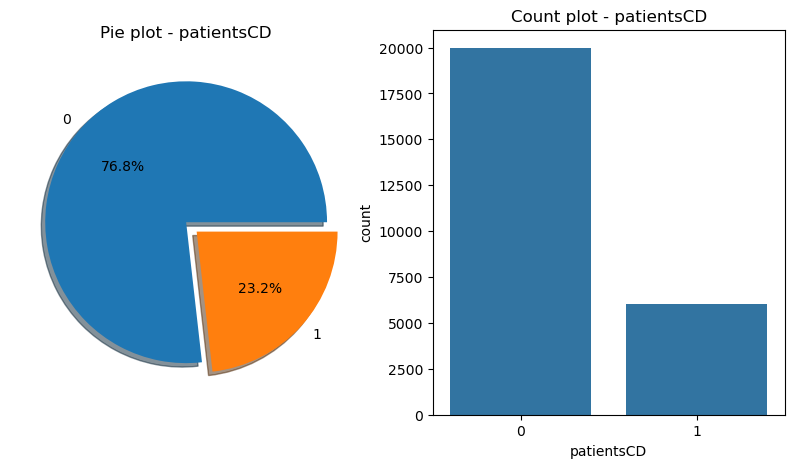

percentage of NO and YES
 patientsCD
0    76.793541
1    23.206459
Name: count, dtype: float64


In [8]:
df['patientsCD'].value_counts()

# 서브플롯 생성
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie plot 생성
df['patientsCD'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - patientsCD')
ax[0].set_ylabel('')

# Count plot 생성
sns.countplot(x='patientsCD', data=df, ax=ax[1])
ax[1].set_title('Count plot - patientsCD')

# 시각화 출력
plt.show()

# 각각의 클래스가 차지하는 퍼센트 확인
print("percentage of NO and YES\n",df['patientsCD'].value_counts()/len(df)*100)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26010 entries, 0 to 26009
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   create_date        26010 non-null  datetime64[ns]
 1   year               26010 non-null  int32         
 2   month              26010 non-null  int32         
 3   day                26010 non-null  int32         
 4   sido               26010 non-null  object        
 5   sido_cd            26010 non-null  int64         
 6   weekend_yn         26010 non-null  int64         
 7   min_ta             26010 non-null  float64       
 8   max_ta             26010 non-null  float64       
 9   mean_ta            26010 non-null  float64       
 10  gap_ta             26010 non-null  float64       
 11  min_tafeel         26010 non-null  float64       
 12  max_tafeel         26010 non-null  float64       
 13  mean_tafeel        26010 non-null  float64       
 14  gap_ta

In [12]:
# class 추출
y = df['patientsCD']
# 변수(variable) 추출
list1 = ['min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel']
list2 = ['min_hm', 'max_hm', 'mean_hm', 'gap_hm']
list3 = ['min_wbtemp', 'max_wbtemp', 'mean_wbtemp', 'gap_wbtemp']
list4 = ['min_ws', 'max_ws', 'mean_ws']
list5 = ['tropical_3days', 'heatwave_temp', 'heatalert_temp']
list6 = ['ta_min_3days', 'ta_max_3days', 'gap_ta_minmax']
list7 = ['popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman']
list8 = ['ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm']
list9 = ['ta_min_six_am1', 'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2', 'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2', 'ta_mean_six_pm2']
# 리스트를 한 번에 처리하기 위한 변수들
all_lists = [list1, list2, list3, list4, list5, list6, list7, list8, list9]

### Non-Normalization 변수 정보 비교

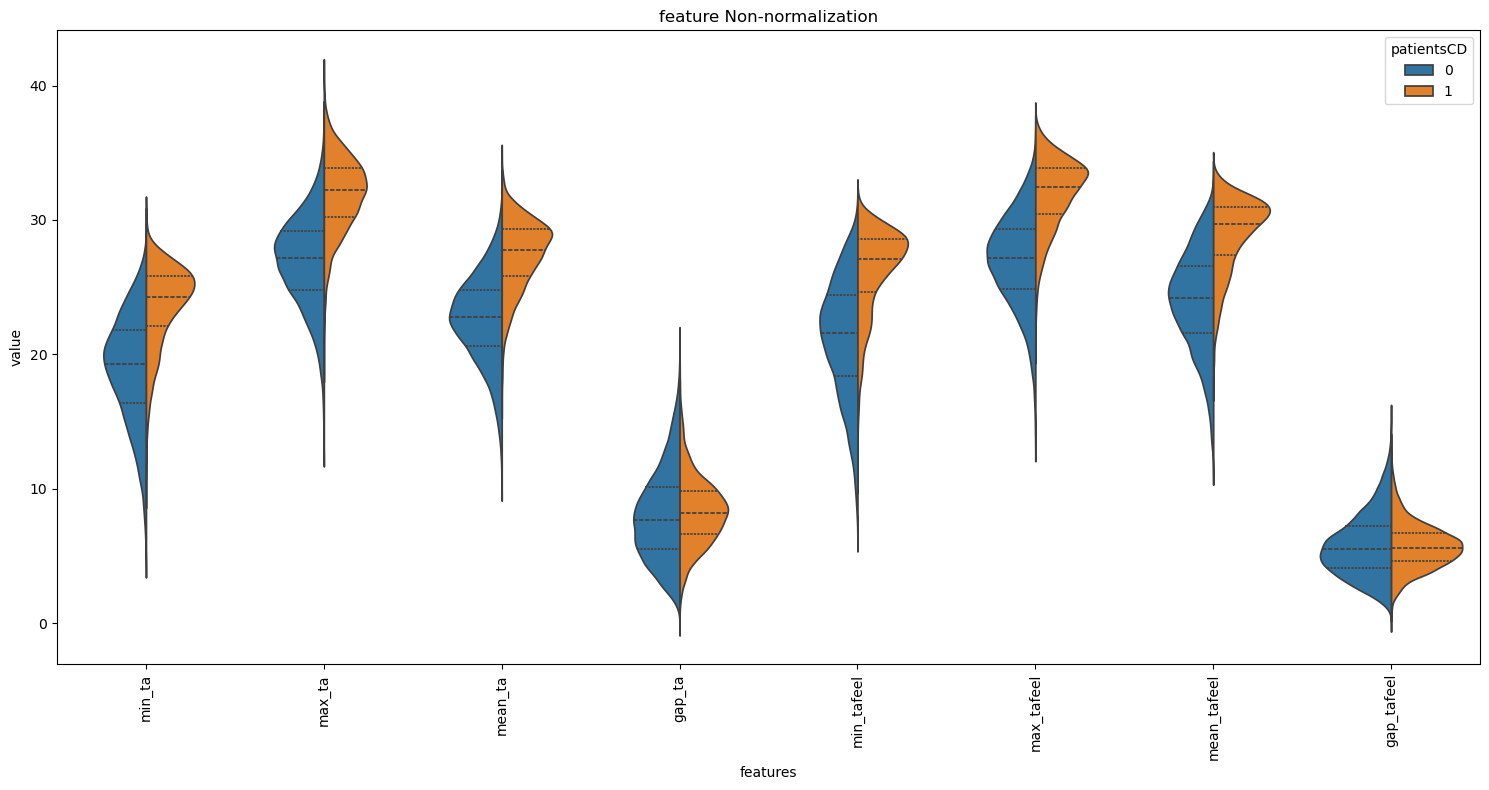

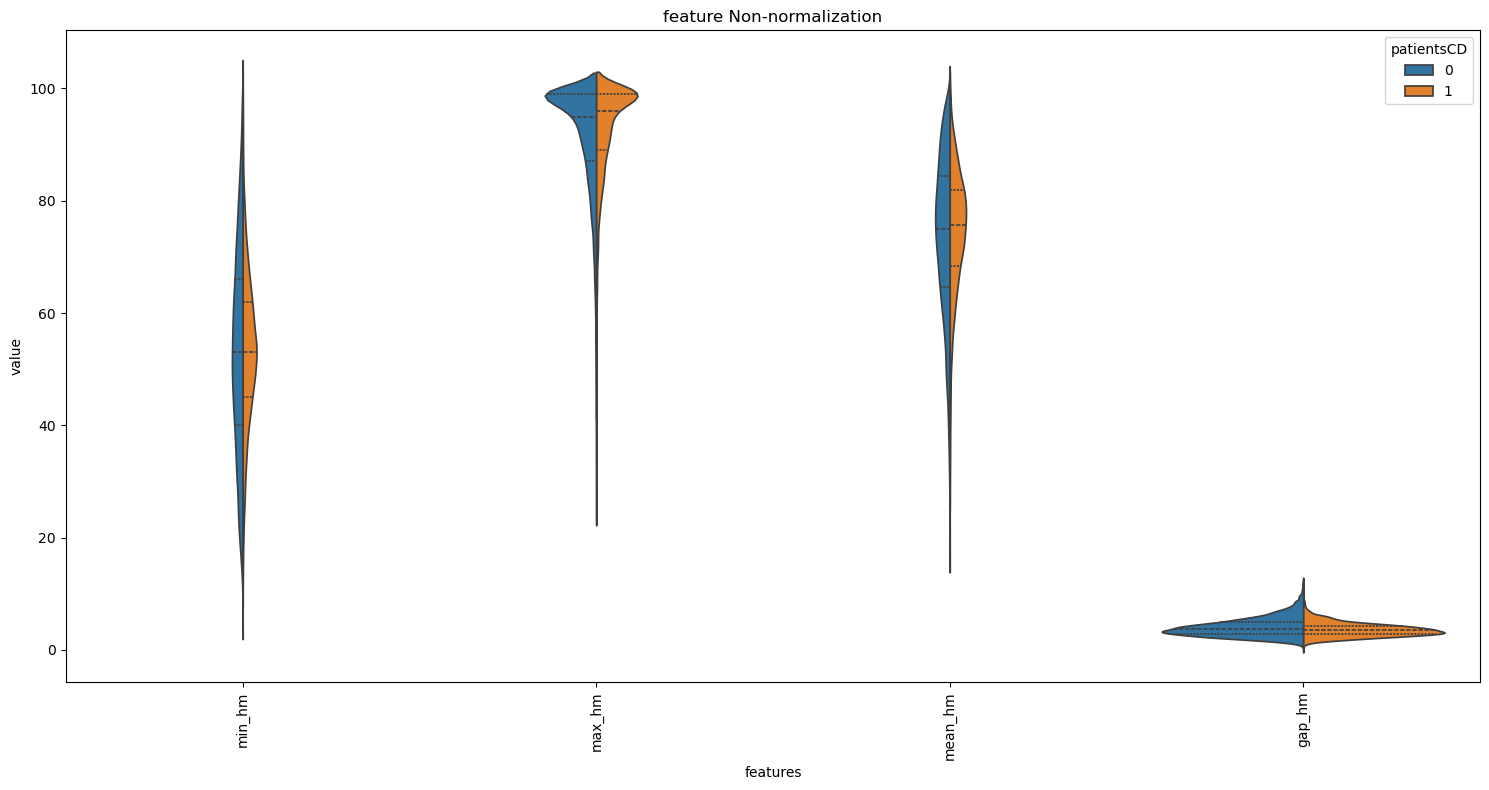

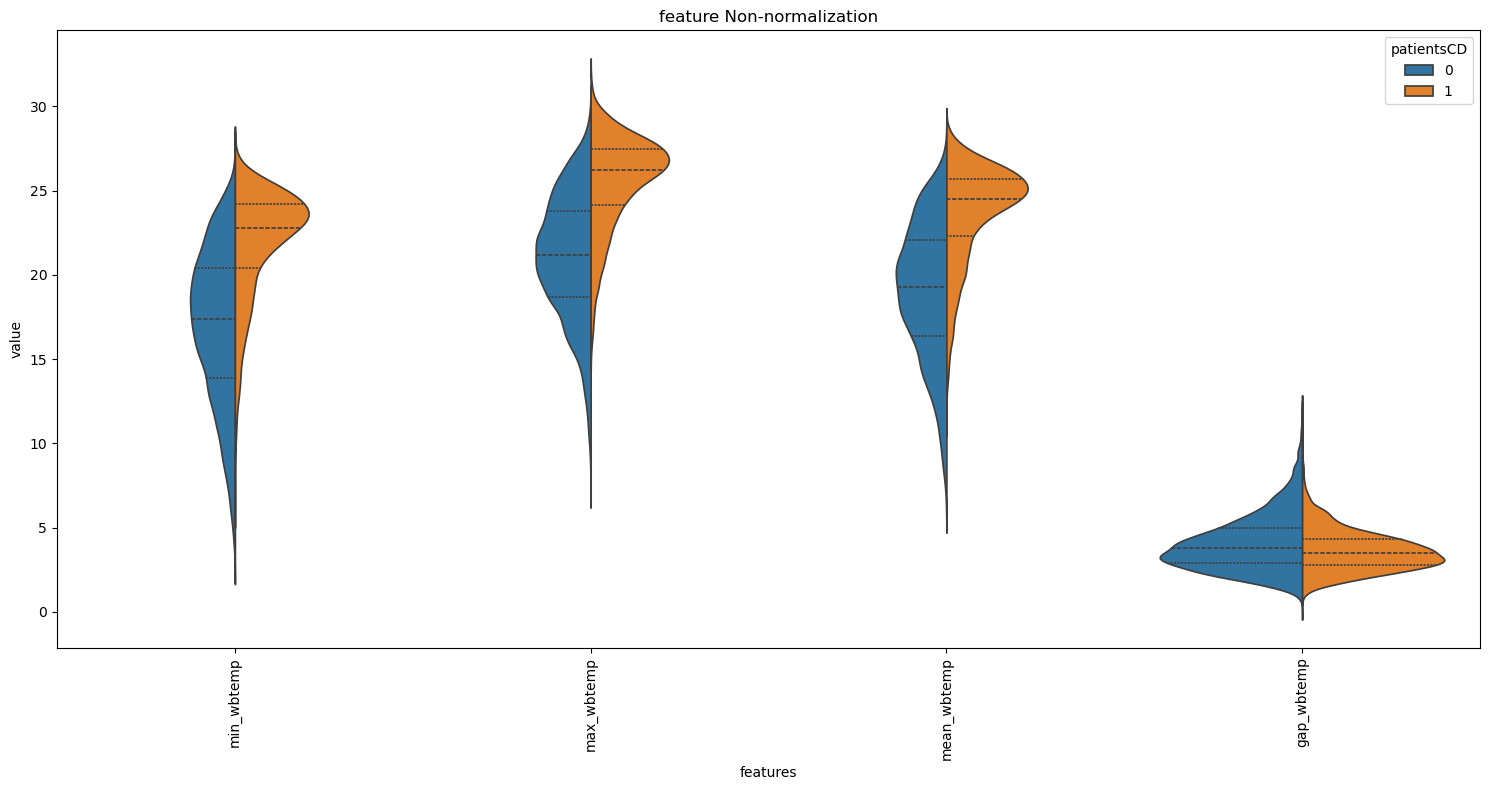

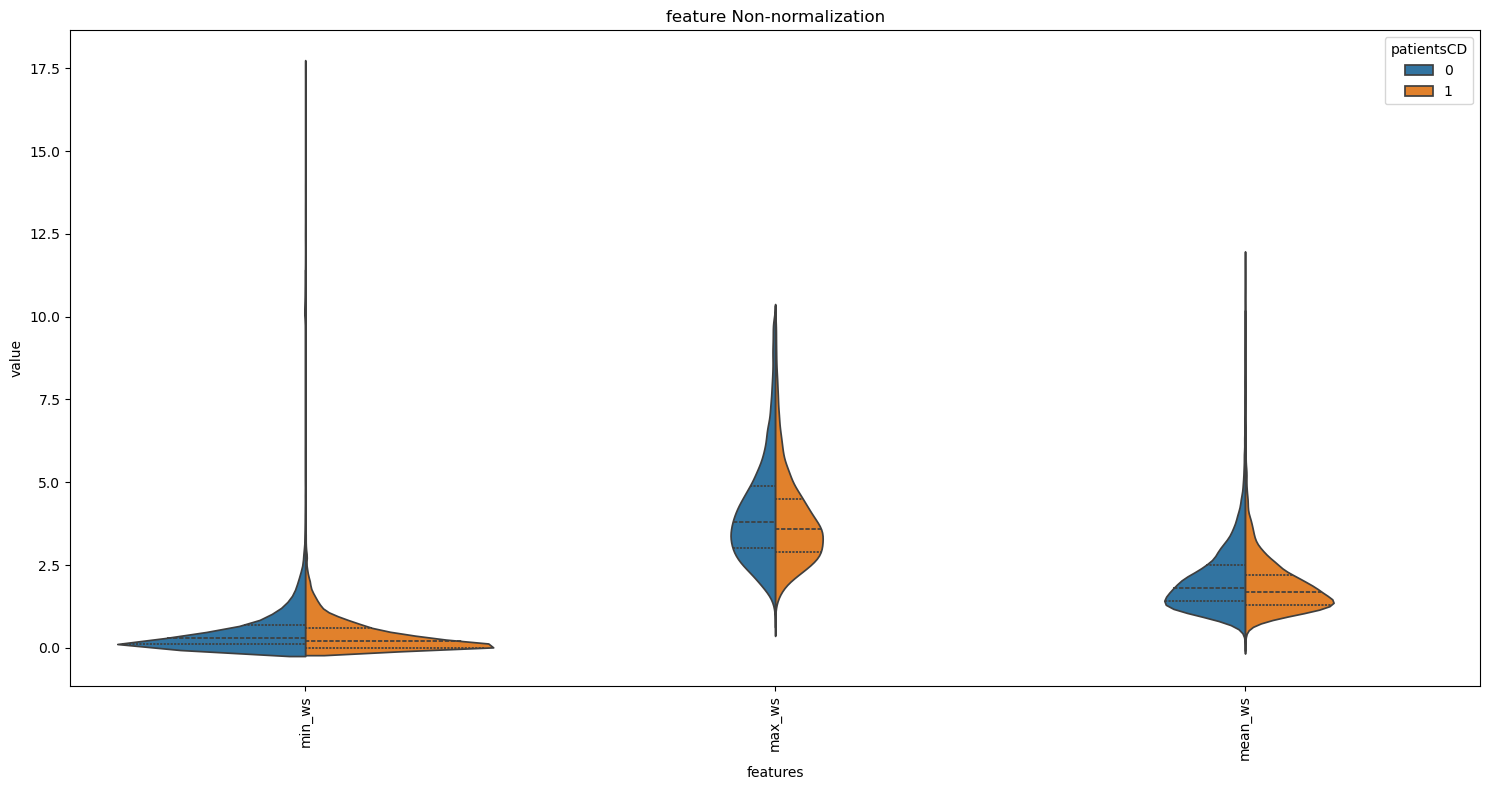

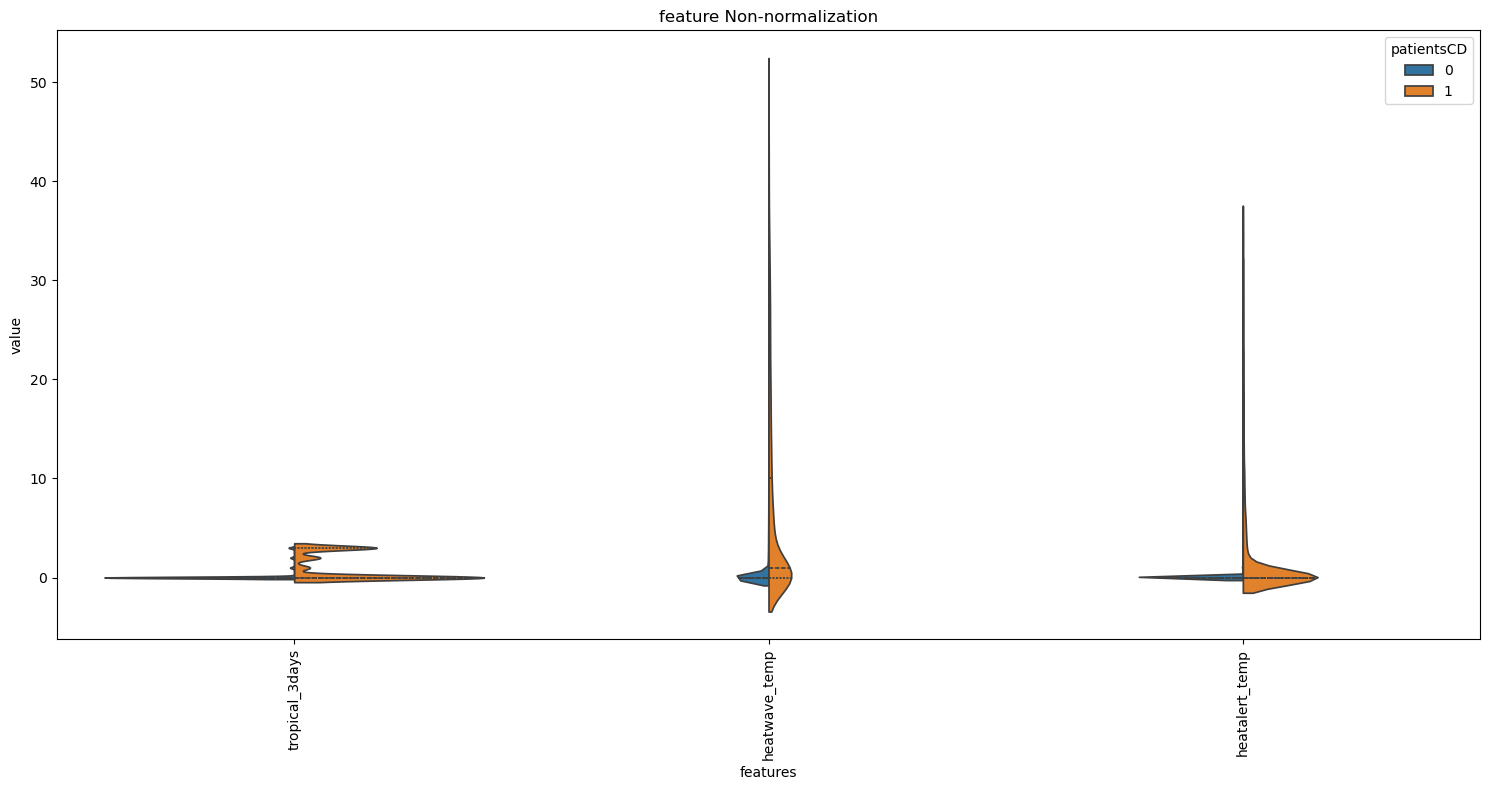

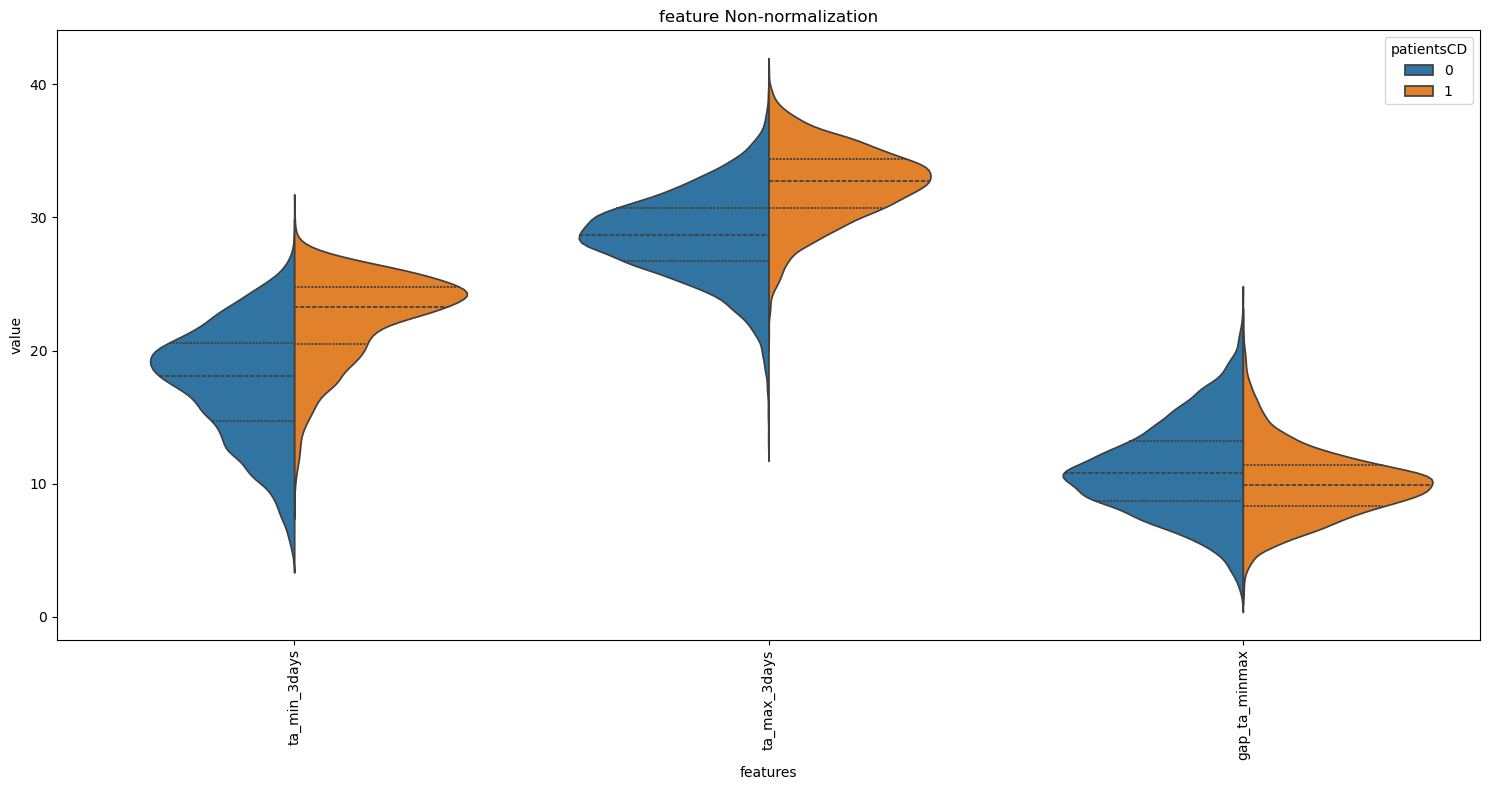

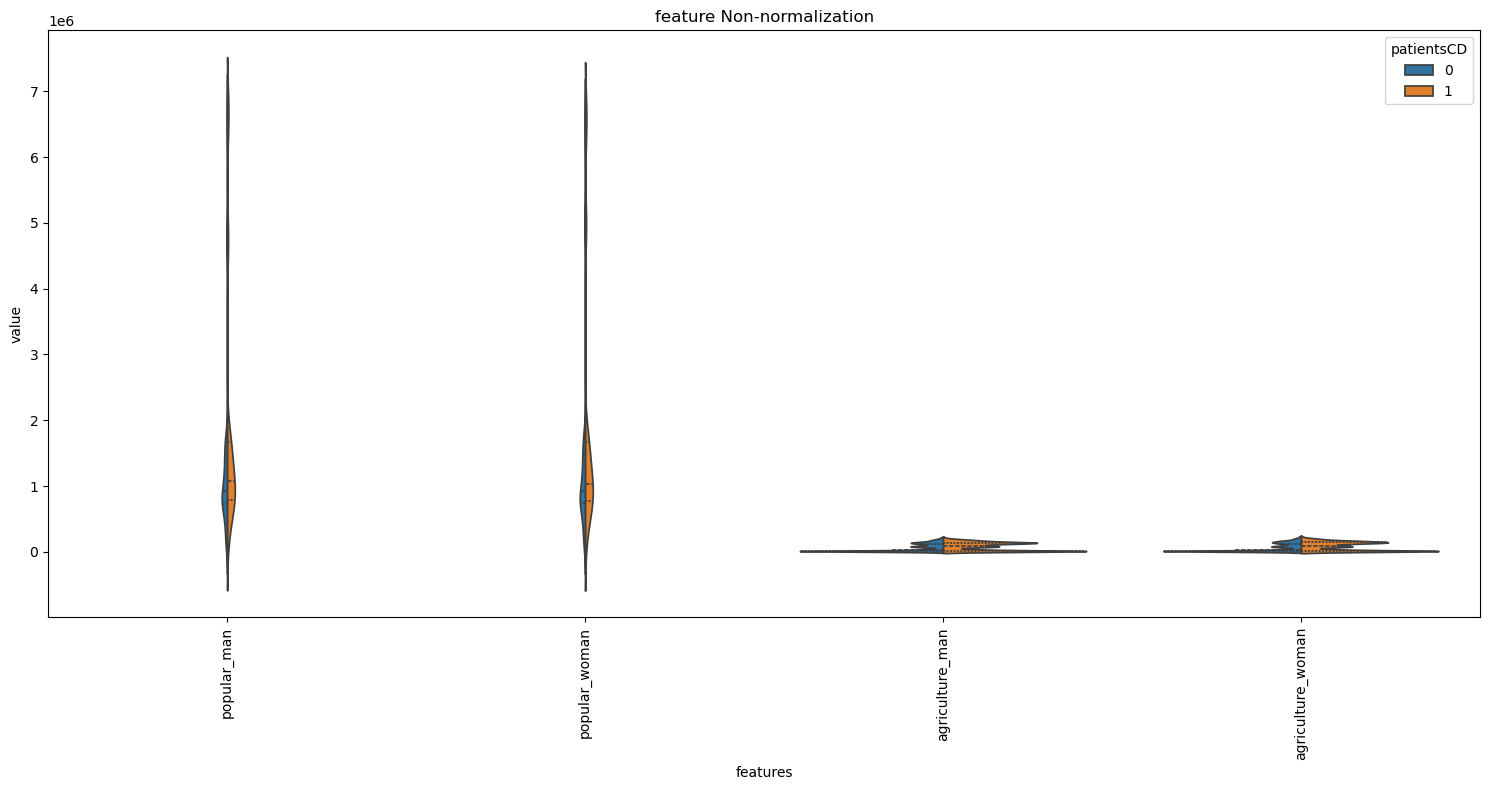

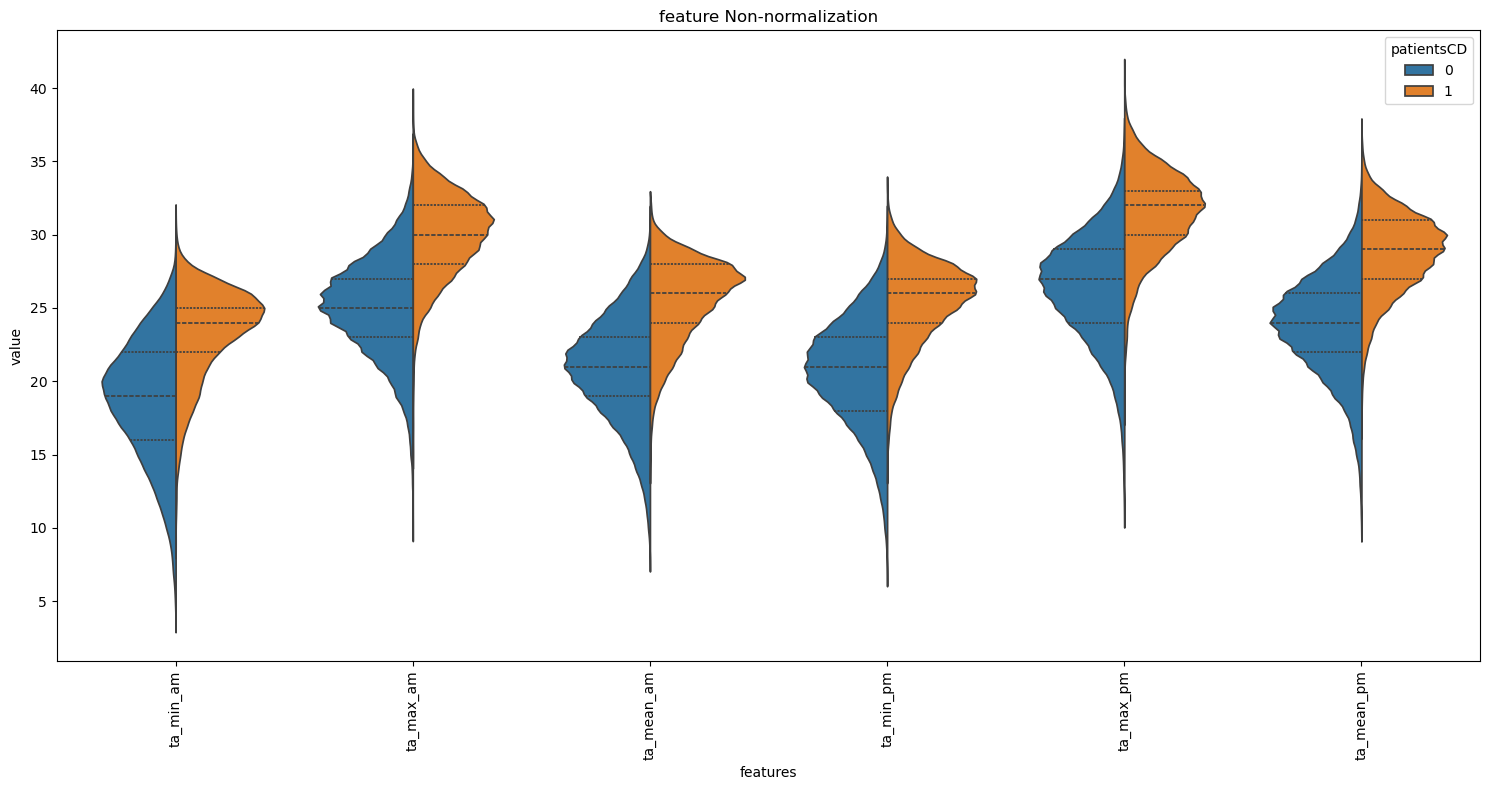

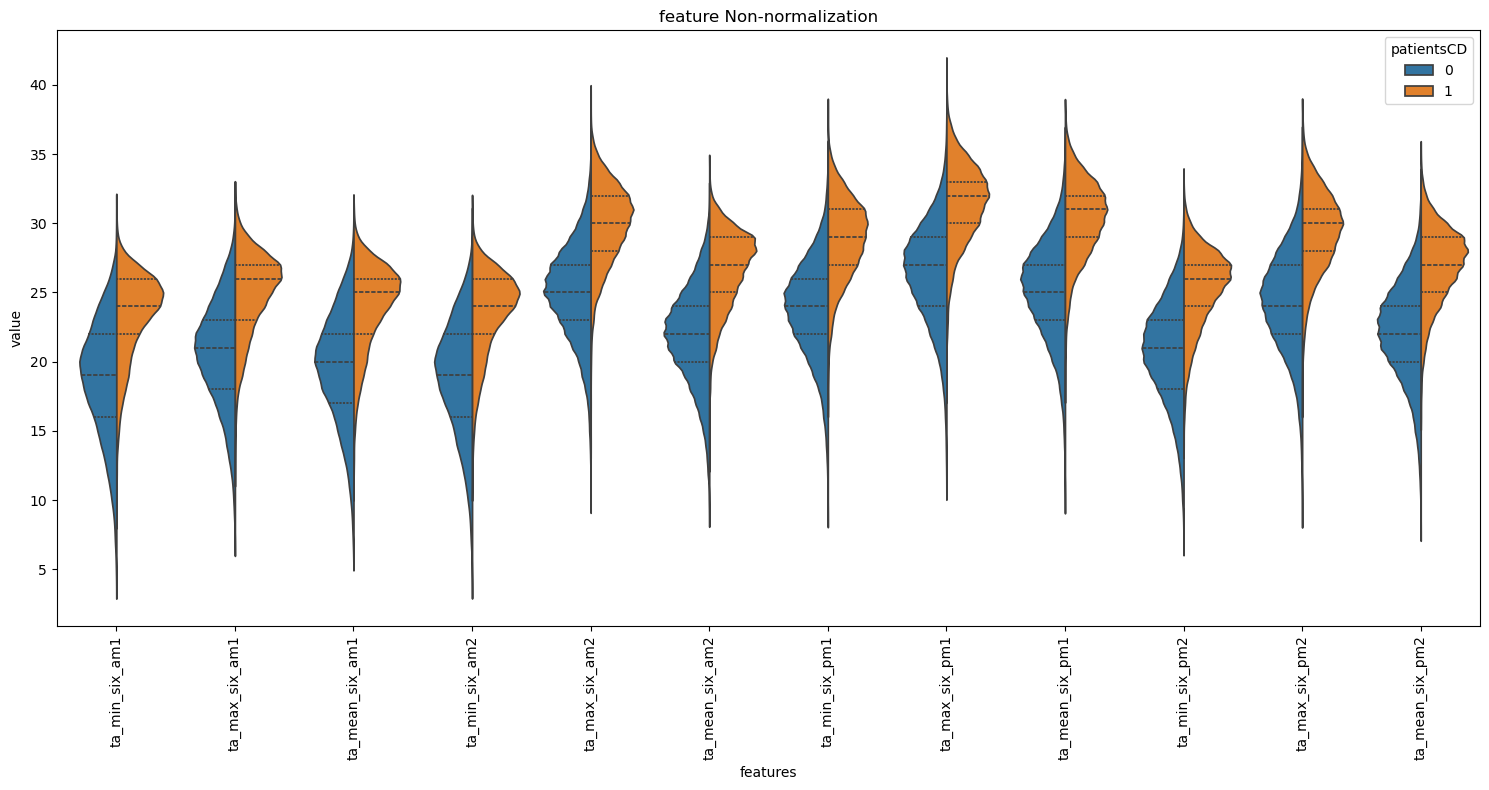

In [13]:
# 각 리스트를 순회하며 시각화
for i, feature_list in enumerate(all_lists):
    data = df[feature_list]
    data = pd.concat([y, data], axis=1)
    
    # 데이터 변환
    data_melted = pd.melt(data, id_vars="patientsCD", var_name="features", value_name="value")
    
    # 시각화
    plt.figure(figsize=(15, 8))
    sns.violinplot(x="features", y="value", hue="patientsCD", data=data_melted, split=True, inner="quart")
    plt.xticks(rotation=90)
    plt.title('feature Non-normalization')
    plt.tight_layout()
    plt.show()

### Normalization 변수 정보 비교

In [13]:
from sklearn.preprocessing import MinMaxScaler

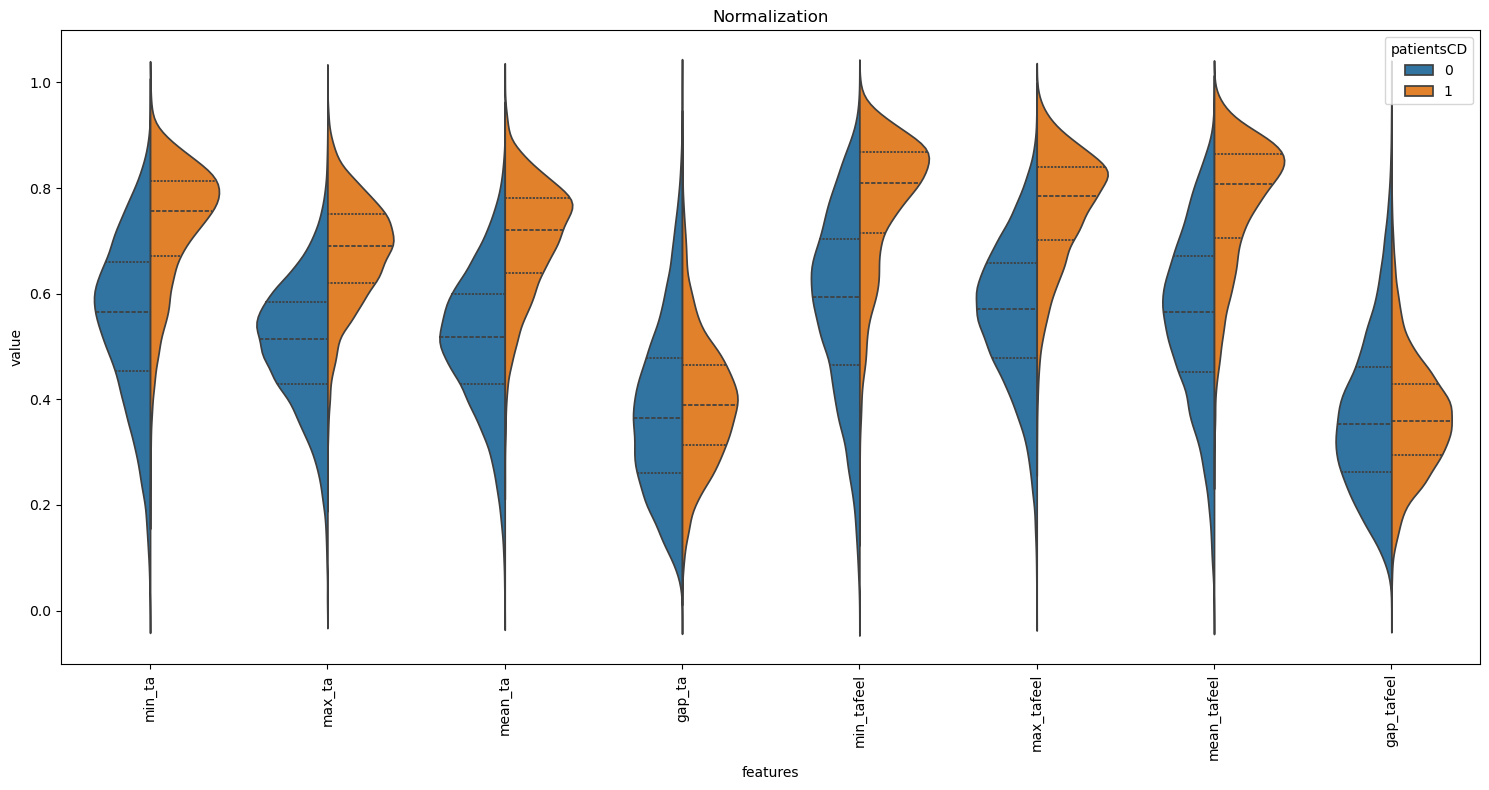

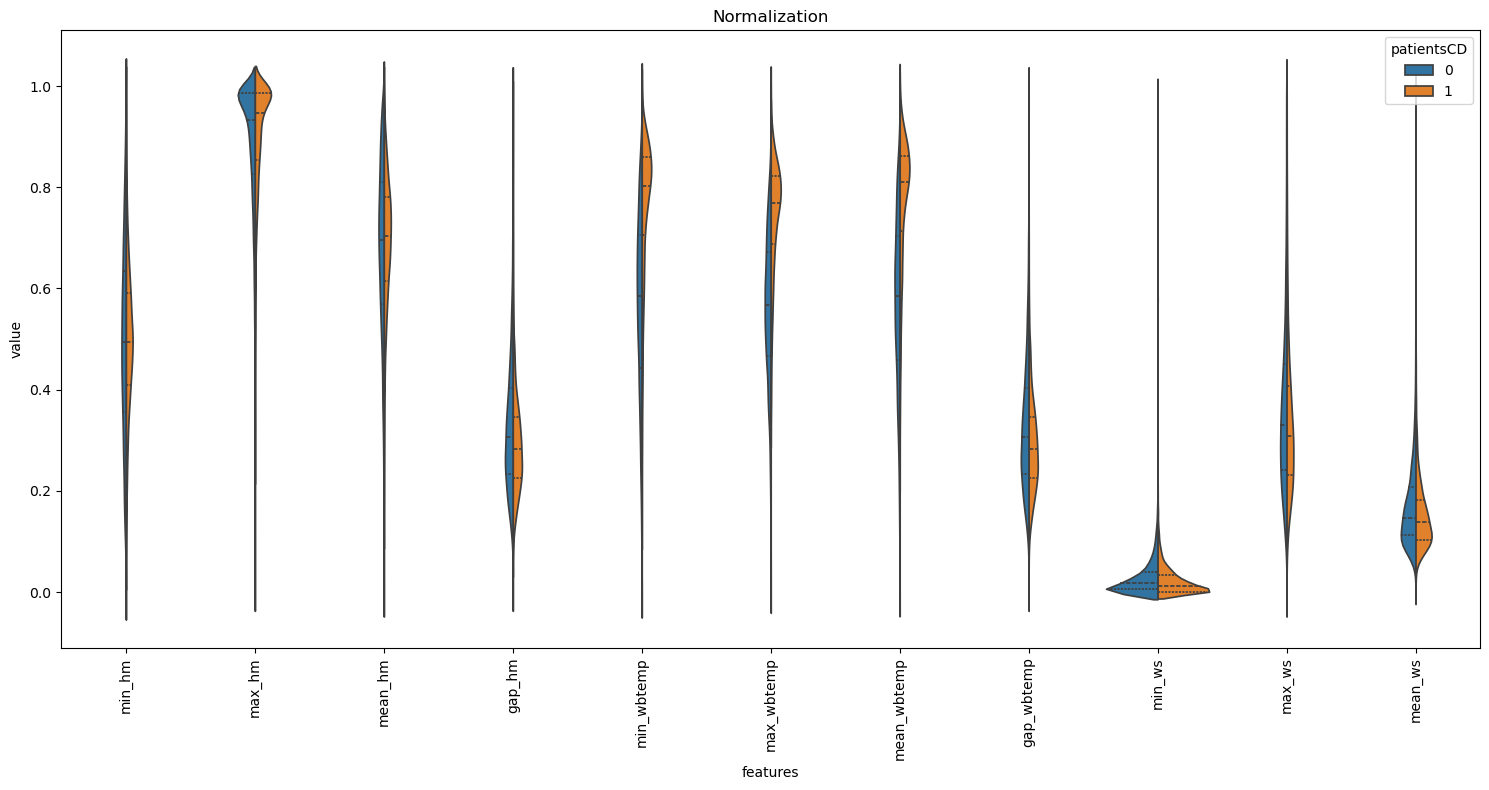

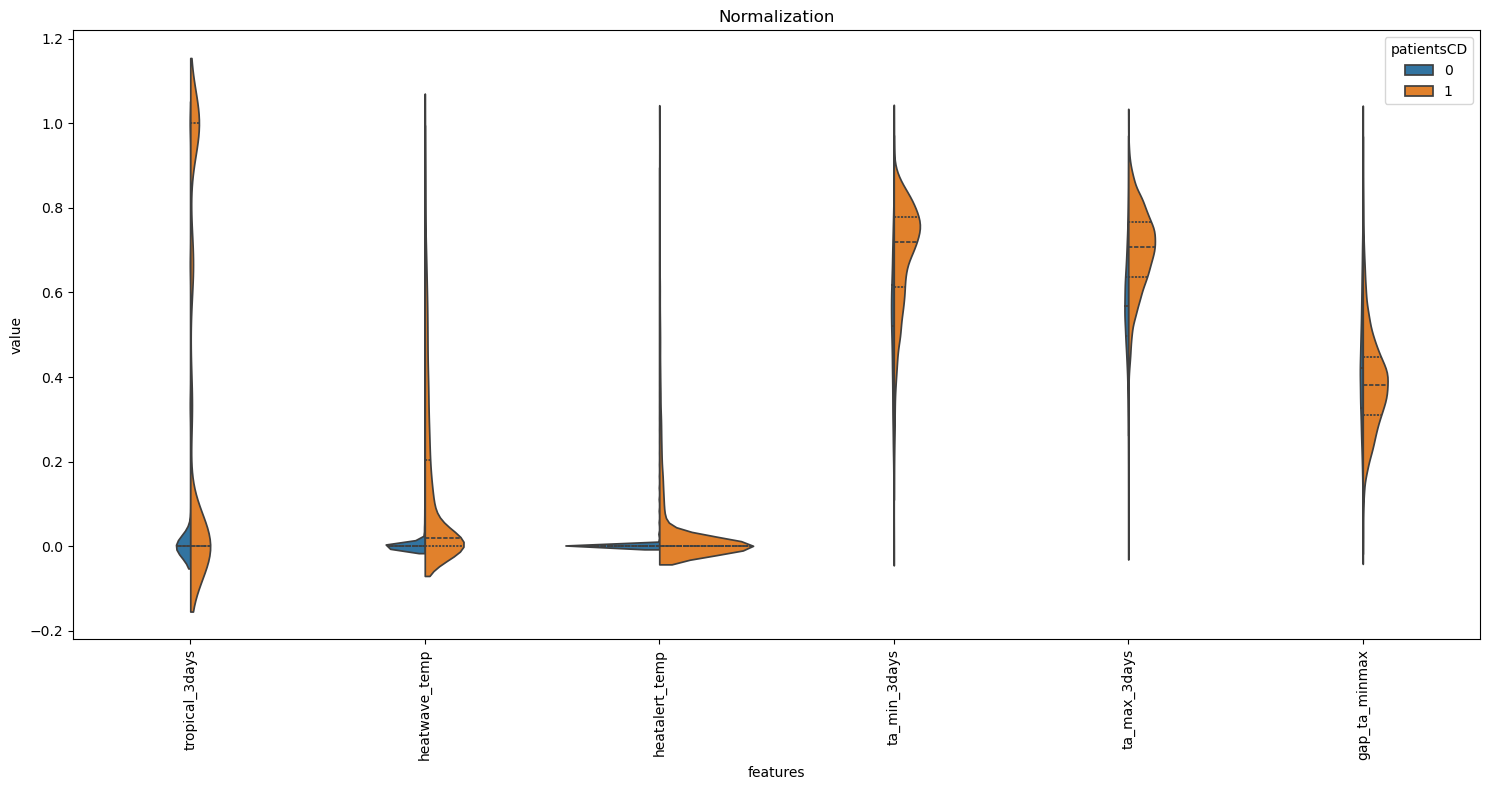

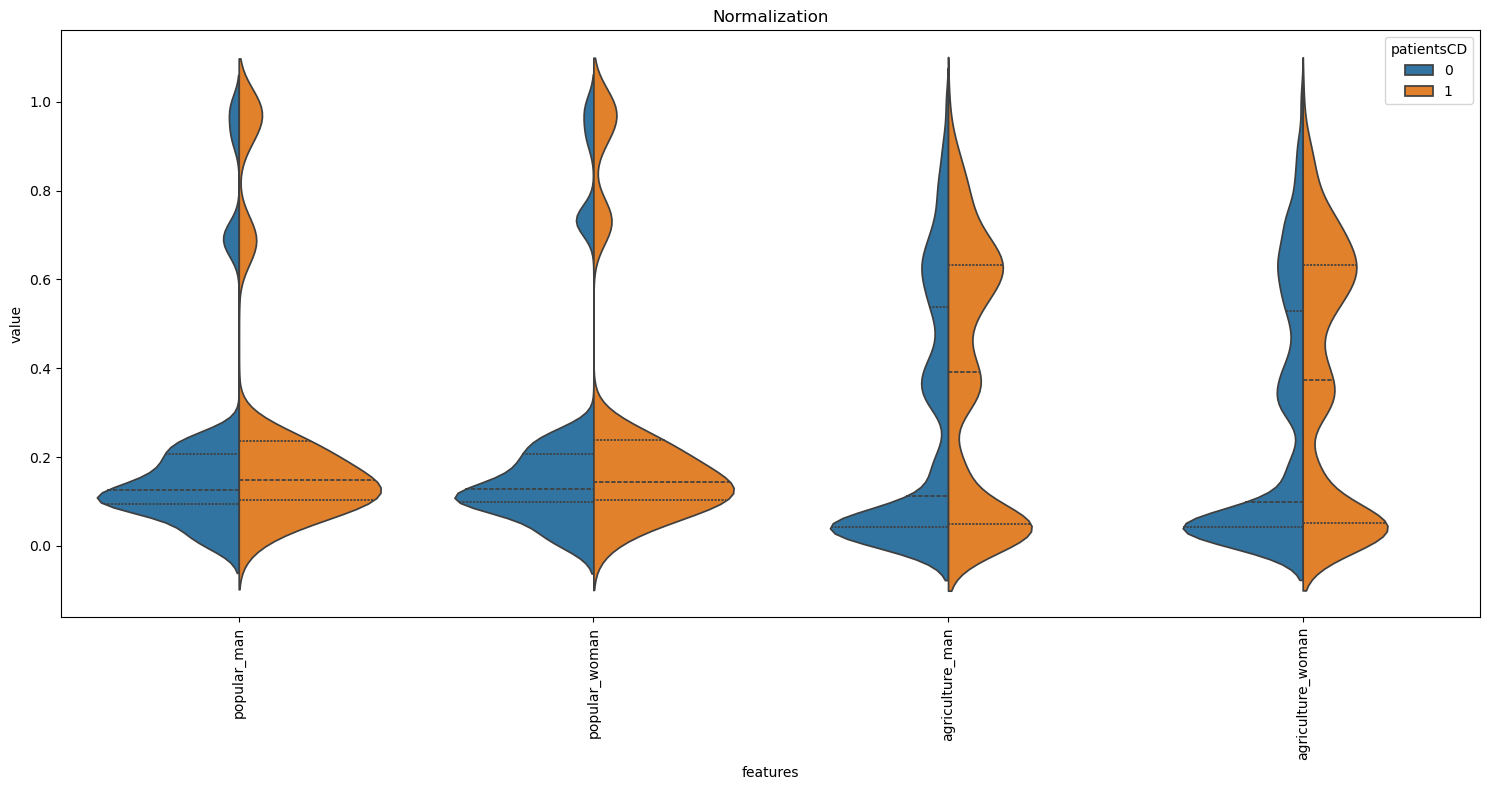

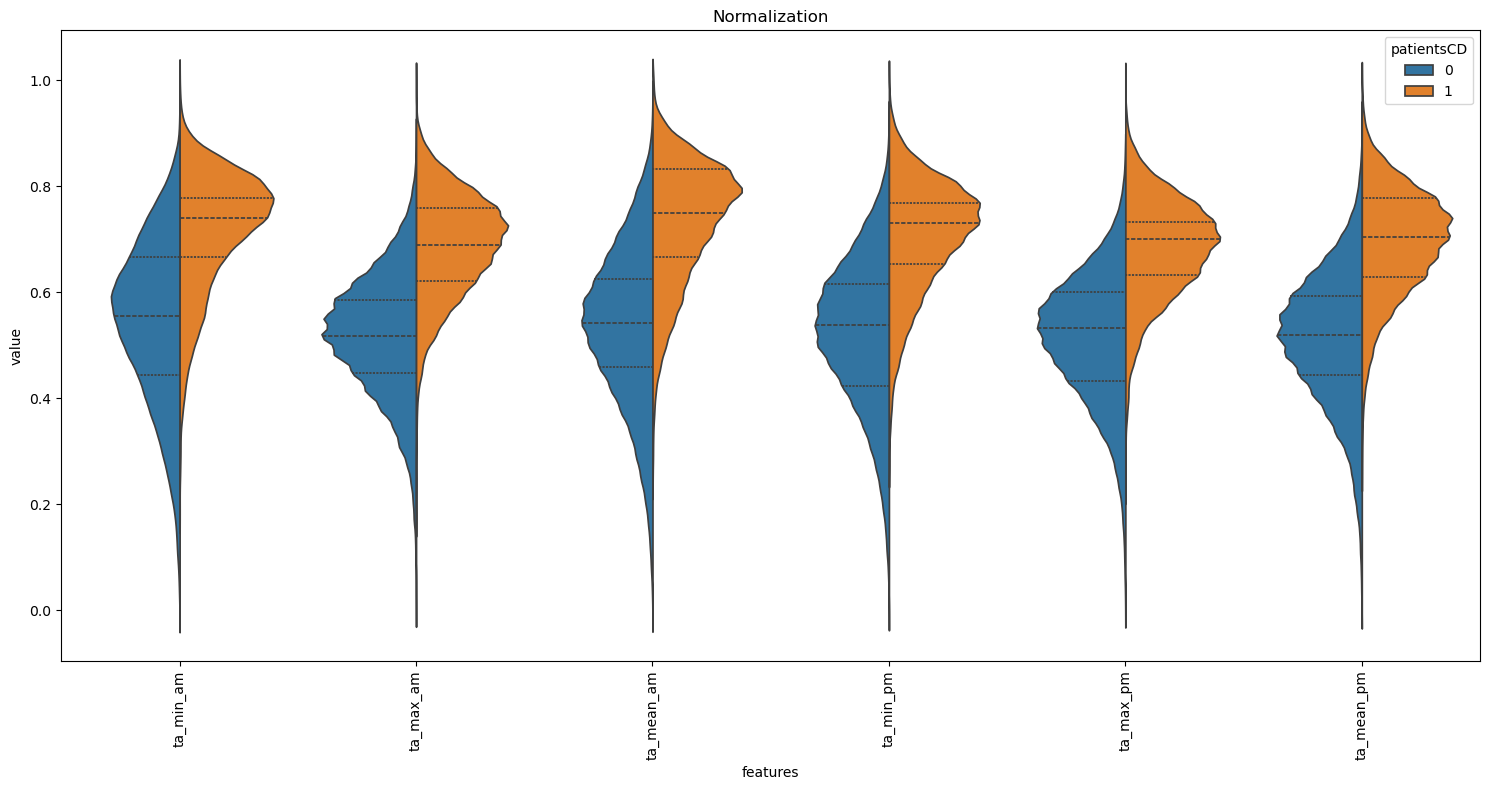

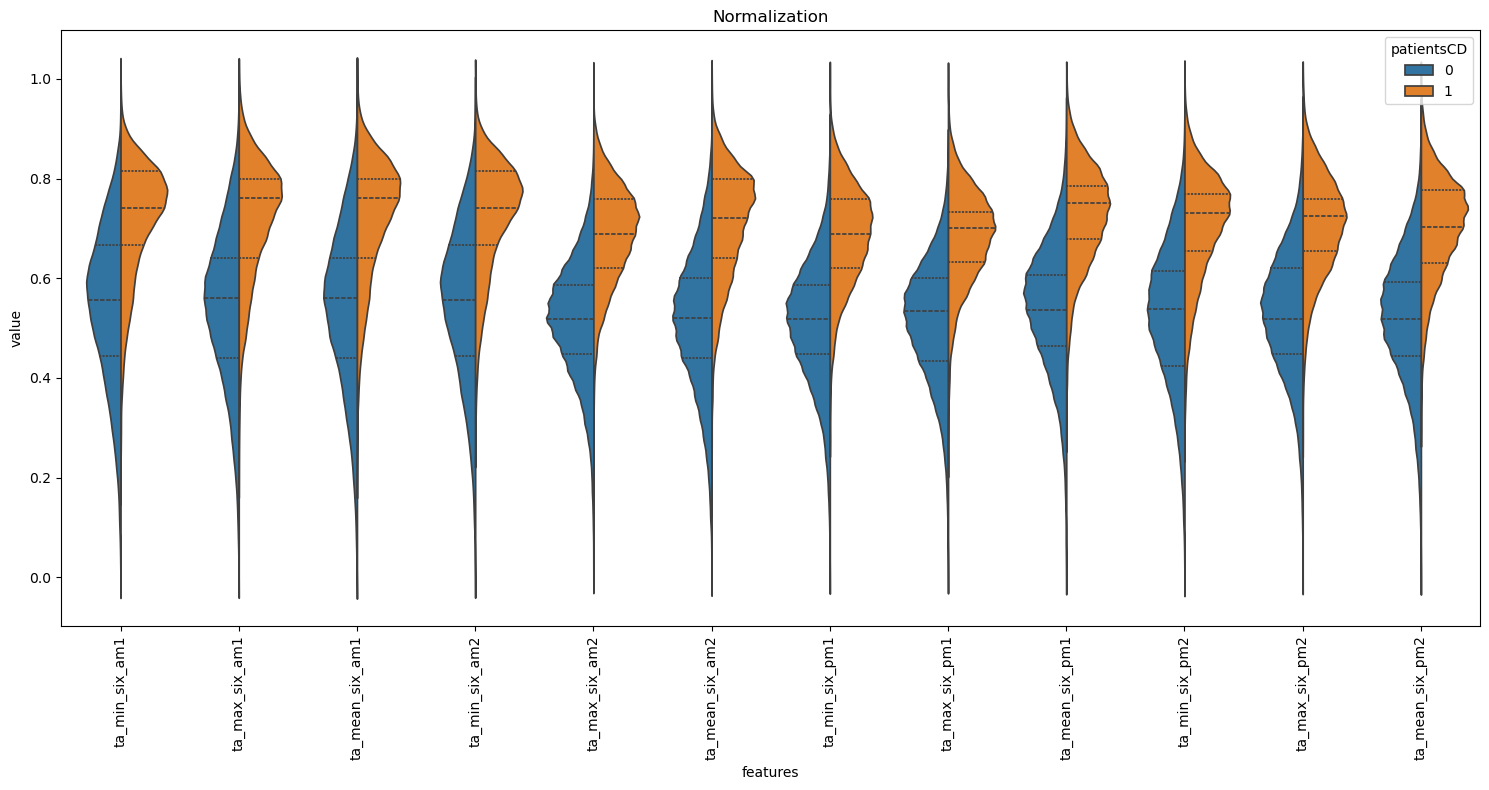

In [14]:
# class 추출
y = df['patientsCD']
# 변수(variable) 추출
list1 = ['min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel']
list2 = ['min_hm', 'max_hm', 'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp', 'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws']
list3 = ['tropical_3days', 'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax']
list4 = ['popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman']
list5 = ['ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm']
list6 = ['ta_min_six_am1', 'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2', 'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2', 'ta_mean_six_pm2']
# 리스트를 한 번에 처리하기 위한 변수들
all_lists = [list1, list2, list3, list4, list5, list6]

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 각 리스트를 순회하며 시각화
for i, feature_list in enumerate(all_lists):
    data = df[feature_list]
    
    # 정규화 적용
    data_normalized = scaler.fit_transform(data)
    data_normalized = pd.DataFrame(data_normalized, columns=feature_list)
    
    # class와 정규화된 데이터를 합침
    data_normalized = pd.concat([y, data_normalized], axis=1)
    
    # 데이터 변환
    data_melted = pd.melt(data_normalized, id_vars="patientsCD", var_name="features", value_name="value")
    
    # 시각화
    plt.figure(figsize=(15, 8))
    sns.violinplot(x="features", y="value", hue="patientsCD", data=data_melted, split=True, inner="quart")
    plt.xticks(rotation=90)
    plt.title(f'Normalization')
    plt.tight_layout()
    plt.show()

<Axes: >

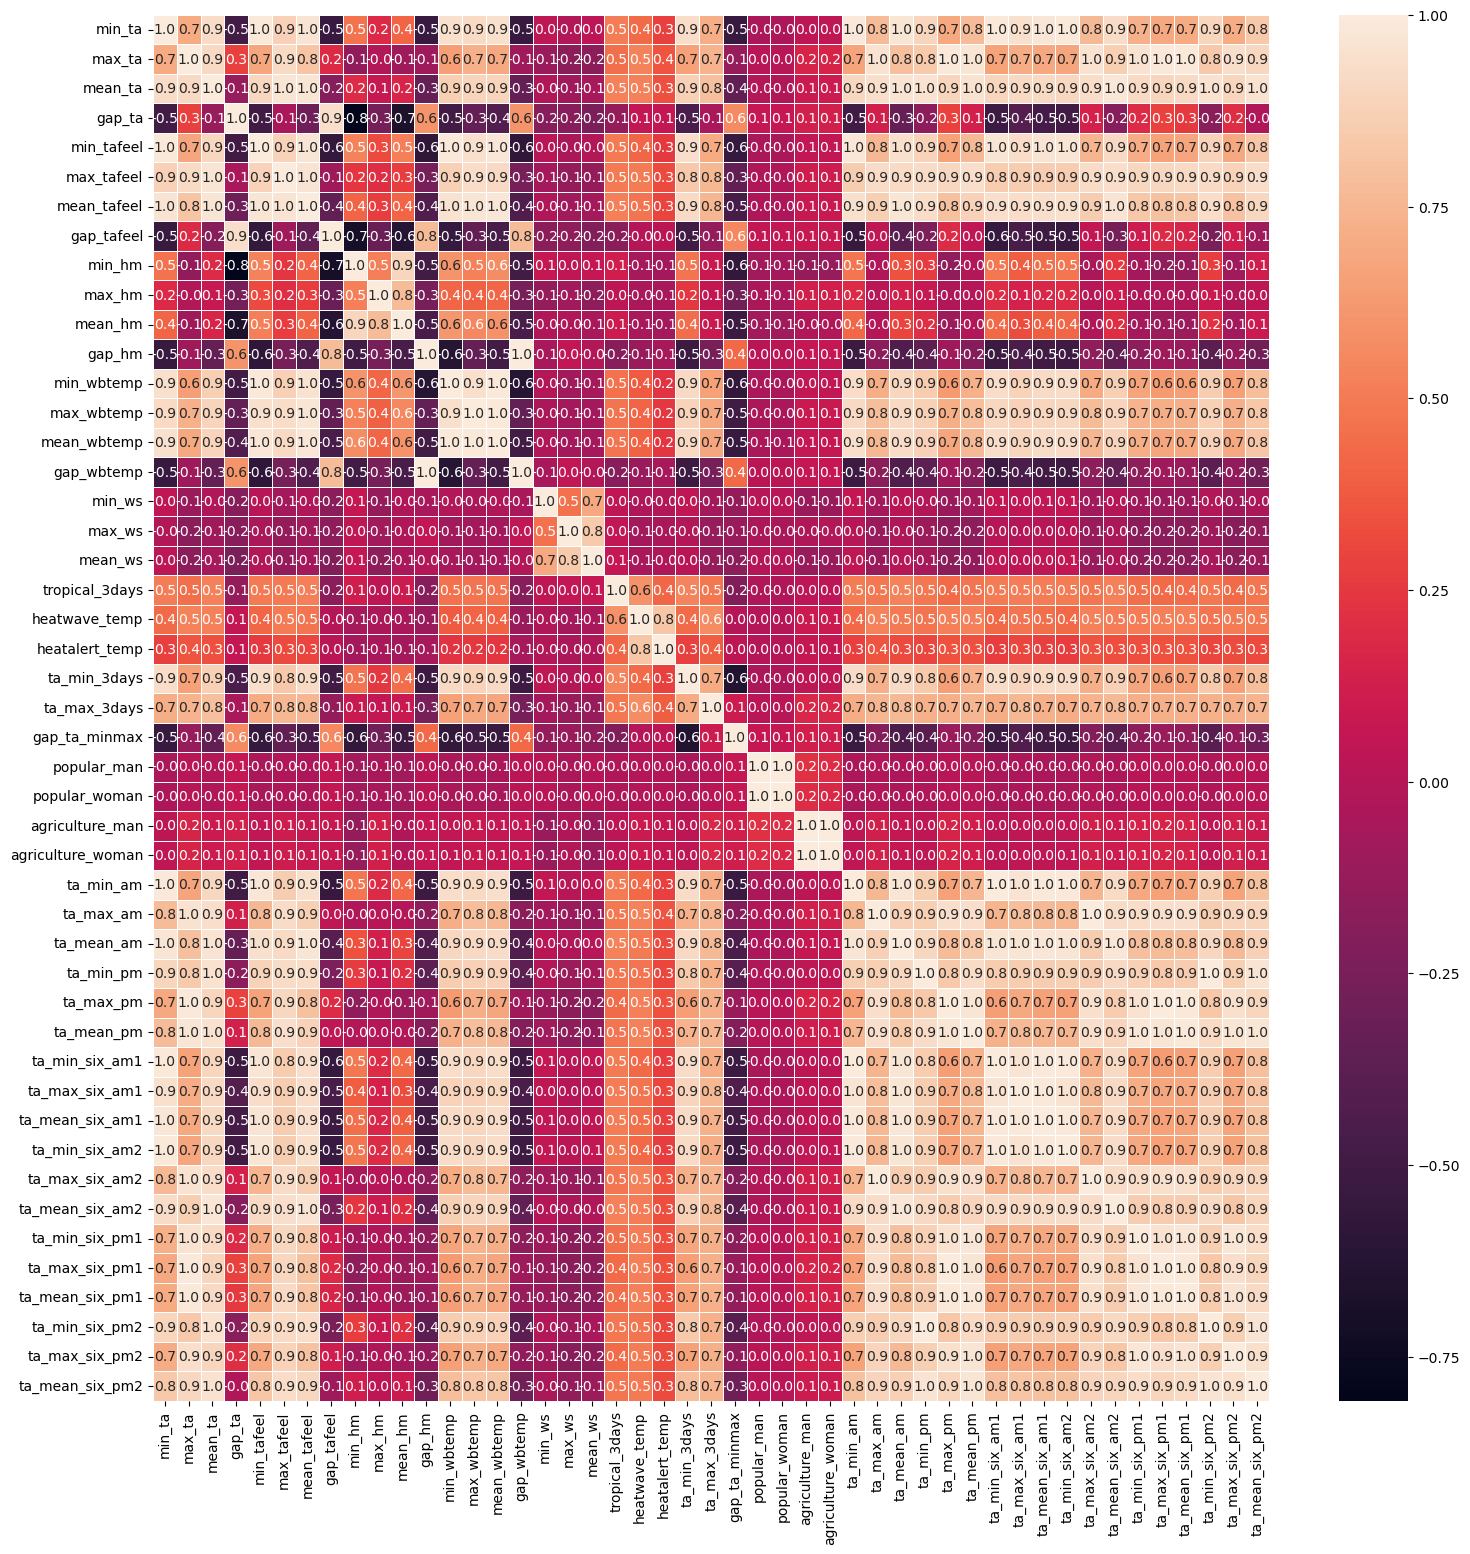

In [16]:
var=['min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm', 'mean_hm', 'gap_hm',
       'min_wbtemp', 'max_wbtemp', 'mean_wbtemp', 'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days', 'heatwave_temp',
       'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman',
       'ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1', 'ta_max_six_am1', 'ta_mean_six_am1',
       'ta_min_six_am2', 'ta_max_six_am2', 'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
       'ta_mean_six_pm2']
df_var=df[var]

# 상관관계 맵(map)
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_var.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)